In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from lib.llm.gpt import GPTClient
from dotenv import load_dotenv
import os

load_dotenv()

API_KEY = os.environ["OPEN_AI_API_KEY"]

client = GPTClient(API_KEY)

In [3]:
from core.tools.toolbelt import Toolbelt
from core.tools.query.news_media import NewsMediaTool
from lib.log import logger, AgentLogLevel
from core.assembly.research import ResearchAssembly

logger.set_log_level(AgentLogLevel.OUTPUT)

assembly = ResearchAssembly(client, Toolbelt(client, [NewsMediaTool(client, n_articles=10, start_date="2023-01-01")]),n_agents=10)
await assembly.prompt("California experienced a particularly rainy season this year.")

INFO:lib.log:...Using tool NewsMediaTool with args "California rainy season 2021"...
INFO:lib.log:......Retrieving www.nytimes.com article with title How Do California’s Storms Weigh In Compared With History’s Big Ones?......
INFO:lib.log:......Retrieving Washington Post article with title Atmospheric rivers won’t end California’s drought......
INFO:lib.log:......Retrieving www.nytimes.com article with title Powerful Storm Hits California, as Residents Brace for More Flooding......
INFO:lib.log:......Retrieving www.nytimes.com article with title What Does All This Rain Mean for California’s Drought?......
INFO:lib.log:......Retrieving www.nytimes.com article with title California National Guard Joins Search for Missing 5-Year-Old, as Rains Ease......
INFO:lib.log:......Retrieving Washington Post article with title California’s vineyards were thirsty. Historic rains were ‘a dream come true.’......
INFO:lib.log:......Retrieving Washington Post article with title Western fires could be de

AssemblyResponse(in_favor=7, against=2, undecided=1, error=0, percent_in_favor=0.7777777777777778, uncertainty=0.1111111111111111, summaries=[['False.'], ['False.'], ['Partially True.'], ['True.'], ['True.'], ['Partially True.'], ['True.'], ['Partially True.'], ['Inconclusive.'], ['True.']])

In [4]:
from core.tools.toolbelt import Toolbelt
from core.tools.query.news_media import NewsMediaTool
from lib.log import logger, AgentLogLevel
from core.assembly.research import ResearchAssembly

logger.set_log_level(AgentLogLevel.OUTPUT)
date_ranges = [
    ('2022-04-01', '2022-07-01'),
    ('2022-05-01', '2022-08-01'),
    ('2022-06-01', '2022-09-01'),
    ('2022-07-01', '2022-10-01'),
    ('2022-08-01', '2022-11-01'),
    ('2022-09-01', '2022-11-05'),
]

results = {}

for range in date_ranges:
    assembly = ResearchAssembly(client, Toolbelt(client, [NewsMediaTool(client, n_articles=25, start_date=range[0], end_date=range[1])]),n_agents=50, max_concurrency=25)
    results[range] =  await assembly.prompt("Democrats will maintain control of the Senate, including the tie-breaking vote of the vice president, in the 2022 November Midterm elections.")

results 

AttributeError: 'Logger' object has no attribute 'info'

In [4]:
results

{('2022-05-01',
  '2022-06-01'): AssemblyResponse(in_favor=9, against=41, undecided=0, error=0, percent_in_favor=0.18, uncertainty=0.0, summaries=[]),
 ('2022-06-01',
  '2022-07-01'): AssemblyResponse(in_favor=10, against=40, undecided=0, error=0, percent_in_favor=0.2, uncertainty=0.0, summaries=[]),
 ('2022-07-01',
  '2022-08-01'): AssemblyResponse(in_favor=9, against=41, undecided=0, error=0, percent_in_favor=0.18, uncertainty=0.0, summaries=[]),
 ('2022-08-01',
  '2022-09-01'): AssemblyResponse(in_favor=8, against=42, undecided=0, error=0, percent_in_favor=0.16, uncertainty=0.0, summaries=[]),
 ('2022-09-01',
  '2022-10-01'): AssemblyResponse(in_favor=12, against=38, undecided=0, error=0, percent_in_favor=0.24, uncertainty=0.0, summaries=[]),
 ('2022-10-01',
  '2022-11-05'): AssemblyResponse(in_favor=6, against=44, undecided=0, error=0, percent_in_favor=0.12, uncertainty=0.0, summaries=[])}

In [6]:
from core.assembly.interfaces import AssemblyResponse

cummulative = {}

total_in_favor = 0
total_against = 0

for key, val in results.items():
    total_in_favor += val.in_favor
    total_against += val.against

    cummulative[key] = AssemblyResponse(in_favor=total_in_favor, error=0, against=total_against, undecided=0, percent_in_favor=total_in_favor/(total_in_favor + total_against), uncertainty=0, summaries=[])

cummulative


{('2022-05-01',
  '2022-06-01'): AssemblyResponse(in_favor=9, against=41, undecided=0, error=0, percent_in_favor=0.18, uncertainty=0.0, summaries=[]),
 ('2022-06-01',
  '2022-07-01'): AssemblyResponse(in_favor=19, against=81, undecided=0, error=0, percent_in_favor=0.19, uncertainty=0.0, summaries=[]),
 ('2022-07-01',
  '2022-08-01'): AssemblyResponse(in_favor=28, against=122, undecided=0, error=0, percent_in_favor=0.18666666666666668, uncertainty=0.0, summaries=[]),
 ('2022-08-01',
  '2022-09-01'): AssemblyResponse(in_favor=36, against=164, undecided=0, error=0, percent_in_favor=0.18, uncertainty=0.0, summaries=[]),
 ('2022-09-01',
  '2022-10-01'): AssemblyResponse(in_favor=48, against=202, undecided=0, error=0, percent_in_favor=0.192, uncertainty=0.0, summaries=[]),
 ('2022-10-01',
  '2022-11-05'): AssemblyResponse(in_favor=54, against=246, undecided=0, error=0, percent_in_favor=0.18, uncertainty=0.0, summaries=[])}

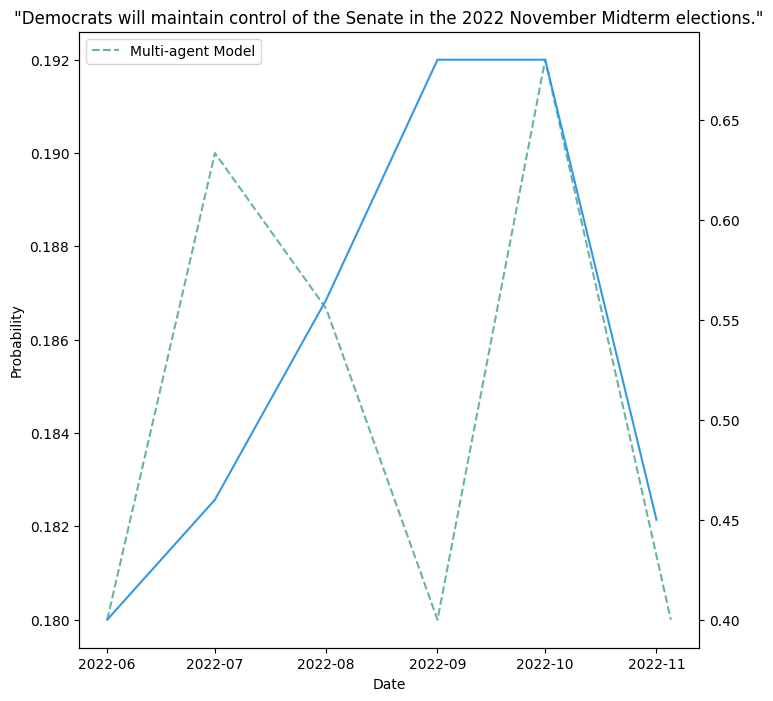

In [10]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

COLOR_SENTIMENT = "#69b3a2"
COLOR_SAP = "#3399e6"
  
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

# plotting the points 

ax1.plot([datetime(int(r[1][0:4]), int(r[1][5:7]), int(r[1][8:10])) for r in cummulative.keys()], [(r.percent_in_favor) for r in cummulative.values()], color=COLOR_SENTIMENT, linestyle="dashed", label="Multi-agent Model")
ax2.plot([datetime(int(r[0:4]), int(r[4:6]), int(r[6:8])) for r in ['20220601', '20220701', '20220801', '20220901', '20221001', '20221101']], [1 -r for r in [0.60, 0.54, 0.44, 0.32, 0.32, 0.55]], color=COLOR_SAP, label="538 Model")

ax1.set_ylabel("Probability")
ax1.set_xlabel("Date")

ax1.legend()
  
# giving a title to my graph
plt.title('"Democrats will maintain control of the Senate in the 2022 November Midterm elections."')
  
# function to show the plot
plt.show()